LEVEL 1

Exercise 1: Connect Python to MySQL Workbench and load your Sprint 4 database data to use in all exercises.

In [88]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
#Connect to the database
conn = None
try:
    conn = mysql.connector.connect(
        host='127.0.0.1',
        port=3306,
        user='root',
        password='toctow-ridbeb-nAhfu0',
        database='sprintstar'
    )
    if conn.is_connected():
        print("Connected to MySQL!")
        cursor = conn.cursor()
        cursor.execute("SHOW TABLES;")
        tables = [t[0] for t in cursor.fetchall()]
        dfs = {}
        for t in tables:
          dfs[t] = pd.read_sql(f"SELECT * FROM {t}", conn)
except Error as e:
    print("Error:", e)

cursor.close()
conn.close()

Connected to MySQL!


C:\Users\esrak\AppData\Local\Temp\ipykernel_27344\2262421900.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[t] = pd.read_sql(f"SELECT * FROM {t}", conn)


In [90]:
tables

['card_status',
 'companies',
 'credit_cards',
 'products',
 'transaction_products',
 'transactions',
 'users']

In [91]:
card_status = dfs["card_status"]
companies = dfs["companies"]
credit_cards = dfs["credit_cards"]
products = dfs["products"]
tx_products = dfs["transaction_products"]
tx= dfs["transactions"]
users = dfs["users"]

In [92]:
users["birth_date"] = pd.to_datetime(users["birth_date"], errors="coerce")
users["age"] = (pd.Timestamp.now() - users["birth_date"]).dt.days // 365
users.head()

,id,source_id,region,name,surname,phone,email,birth_date,country,city,postal_code,address,age
0,1,1,american,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,1985-11-17,United States,New York,10001,348-7818 Sagittis St.,39
1,2,2,american,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,1992-08-23,United States,Philadelphia,19101,903 Sit Ave,33
2,3,3,american,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,1998-04-29,United States,Houston,77001,736-2063 Tellus St.,27
3,4,4,american,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,1989-02-18,United States,Phoenix,85001,Ap #545-2244 Erat. Rd.,36
4,5,5,american,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,1998-09-26,United States,Philadelphia,19101,341-2821 Ultrices Av.,27


In [93]:
tx["timestamp"] = pd.to_datetime(tx["timestamp"], errors="coerce")
tx["year"] = tx["timestamp"].dt.year
tx["month"] = tx["timestamp"].dt.month_name().str[:3]
tx = tx.rename(columns = {"longtitude":"longitude"}) # I realized after :)
tx.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,latitude,longitude,year,month
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,CcS-9294,b-2458,2024-08-28 07:16:46,395.43,0,"16, 26, 97, 87",4713,46.199929,1.435540,2024,Aug
1,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,CcS-5019,b-2370,2016-12-21 20:07:18,155.63,0,"66, 69, 87",438,41.597206,12.221760,2016,Dec
2,00045D6B-ED2E-4F2F-8186-CEE074D875D0,CcS-6699,b-2390,2020-07-14 15:37:45,326.01,0,"30, 11, 16, 81",2118,29.757296,-95.379637,2020,Jul
3,000481C3-1C26-4FEF-83A0-4CD0EB004BBD,CcS-6696,b-2230,2017-09-04 19:44:53,161.60,0,72,2115,53.548884,-113.503053,2017,Sep
4,00051AA4-9CBE-4268-B070-C38062A1B3E2,CcS-7606,b-2266,2017-01-05 18:19:25,148.91,0,18,3025,52.208370,5.690806,2017,Jan


Exercise 2: For each item, create an appropriate visualization based on the variables specified. Interpret the results based on your data.

Ex2.1:One numeric variable

<function matplotlib.pyplot.show(close=None, block=None)>

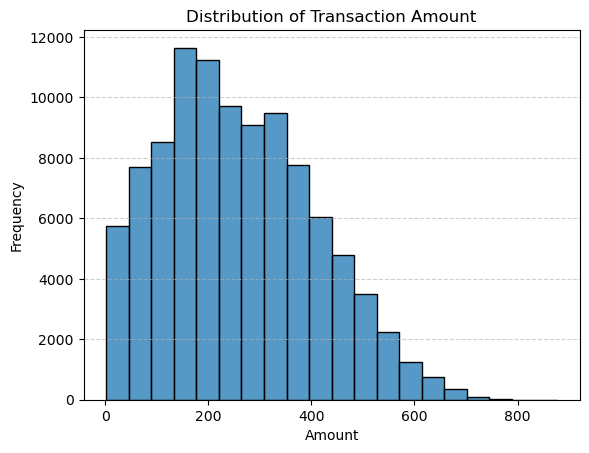

In [94]:
sns.histplot(data = tx, x = 'amount', bins=20) 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel('Frequency')
plt.show


This histogram shows the distribution of transaction amount. Most transactions are between $100 and $300, indicating that mid-range purchases are the most common. As the amount increases beyond $400, the frequency declines, suggesting that high-value transactions are relatively rare.

Ex2.2: Two numeric variables

Example 1 :

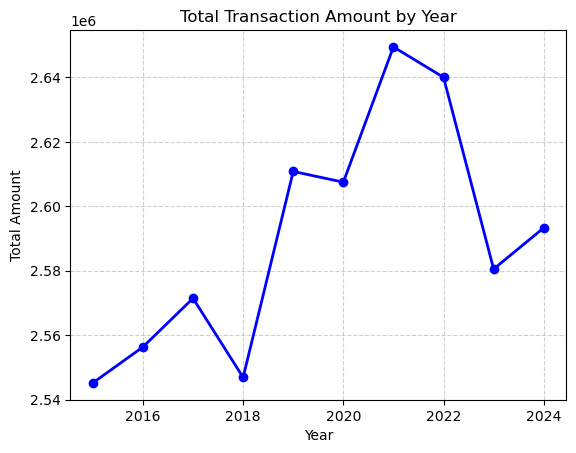

In [95]:
yearly_amount = tx.groupby("year")["amount"].sum().reset_index()

plt.plot(yearly_amount["year"], yearly_amount["amount"], marker='o', linewidth=2, color='blue')
plt.title("Total Transaction Amount by Year")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


This line chart shows the total transaction amount by year from 2015 to 2024. There is a general upward trend with some fluctuations over the years. The total transaction amount peaked around 2021, indicating a significant increase in activity during that period, followed by a slight decline in the following years. Despite these variations, the total amounts remain relatively stable, suggesting consistent transaction volumes with occasional growth spikes.

Example 2:

In [98]:
users = users.rename(columns={"source_id":"user_id"})
tx_users_df = tx.merge(users, on="user_id", how="left").reset_index(drop=True)
tx_users_df = tx_users_df.rename(columns={"id_x":"transaction_id"})
tx_users_df.columns


Index(['transaction_id', 'card_id', 'business_id', 'timestamp', 'amount',
       'declined', 'product_ids', 'user_id', 'latitude', 'longitude', 'year',
       'month', 'id_y', 'region', 'name', 'surname', 'phone', 'email',
       'birth_date', 'country', 'city', 'postal_code', 'address', 'age'],
      dtype='object')

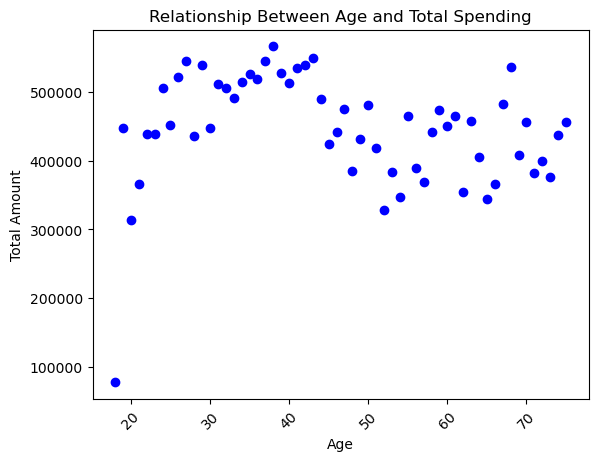

In [99]:
age_amount = tx_users_df.groupby("age")["amount"].sum().reset_index()

plt.scatter(x = age_amount['age'] , y = age_amount['amount'], color= 'blue')

plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Relationship Between Age and Total Spending' )
plt.xticks(rotation=45)
plt.show()



The scatter plot illustrates the relationship between customers’ age and their total spending. In general, spending tends to increase from younger ages, peaking around the late 20s to 40s, and then gradually declines after the age of 50. This pattern suggests that middle-aged customers are generally the highest spenders, while younger and older age groups tend to spend less.

Ex2.3:One categorical variable

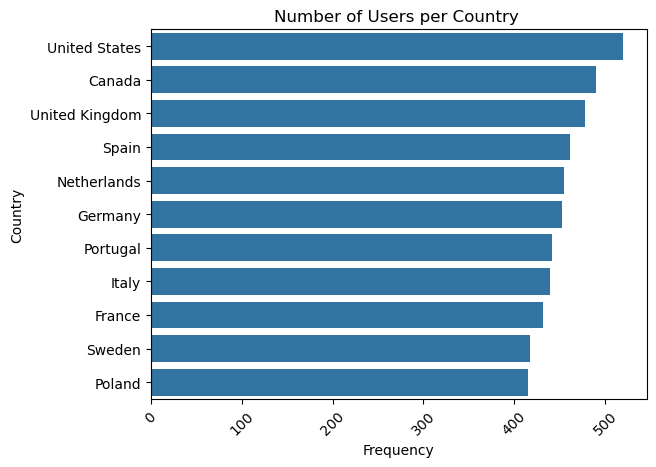

In [100]:
sns.countplot(data = users, y='country', order=users['country'].value_counts().index)

plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Number of Users per Country ')
plt.xticks(rotation=45)
plt.show()

This bar chart displays the number of users per country. The United States has the highest number of users, followed closely by Canada and the United Kingdom. Other European countries such as Spain, the Netherlands, and Germany have slightly fewer users but remain fairly close in count. User distribution appears relatively balanced across countries, with North American countries showing a slightly higher user base compared to Europe.

Ex2.4: One categorical and one numeric variable

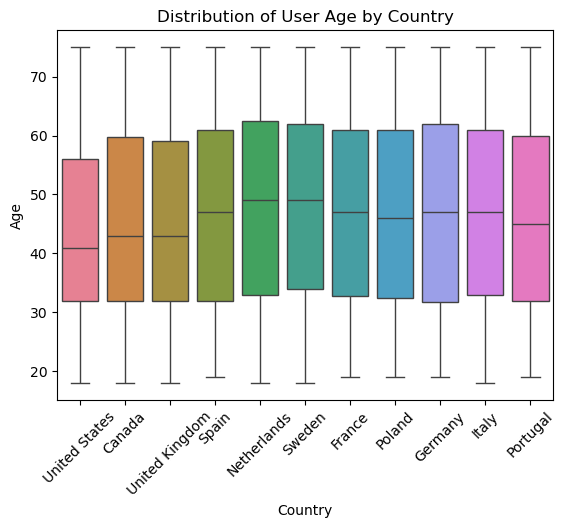

In [101]:
sns.boxplot(data=users, x="country", y="age",hue="country", legend= False)

plt.xticks(rotation=45)
plt.title("Distribution of User Age by Country")
plt.xlabel("Country")
plt.ylabel("Age")
plt.show()

This box plot shows the distribution of user ages across different countries. The median age is fairly consistent, generally ranging between 40 and 50 years old in most countries. The spread of ages is similar across all countries, with most users falling between their mid-20s and early 60s. A few outliers are present in each country, representing younger or older users. Overall, the chart suggests that user age distributions are quite uniform across regions, with no country showing a distinctly older or younger user base.

Ex2.5: Two categorical variables

In [102]:
two_cat= pd.crosstab(tx_users_df['country'], tx_users_df['declined']).reset_index()
two_cat= two_cat.melt(id_vars='country', var_name='declined', value_name='count')
two_cat

,country,declined,count
0,Canada,0,9953
1,France,0,8491
2,Germany,0,8714
3,Italy,0,8551
4,Netherlands,0,8943
5,Poland,0,8257
6,Portugal,0,8754
7,Spain,0,8947
8,Sweden,0,8106
9,United Kingdom,0,9626


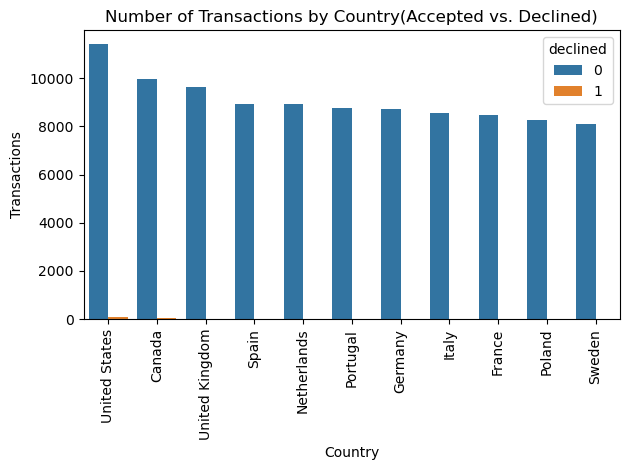

In [116]:
two_cat= two_cat.sort_values('count', ascending=False)
sns.barplot(data = two_cat, x='country', y='count', hue='declined')

plt.xlabel('Country')
plt.ylabel('Transactions')
plt.title('Number of Transactions by Country(Accepted vs. Declined)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

I first created a bar plot to visualize the total number of transactions by country, distinguishing between accepted and declined transactions. However, since the number of declined transactions was significantly lower compared to accepted ones, the declined bars were barely visible in the chart. To make both categories more comparable and visually interpretable, I applied a logarithmic scale to the y-axis and recreated the bar plot.

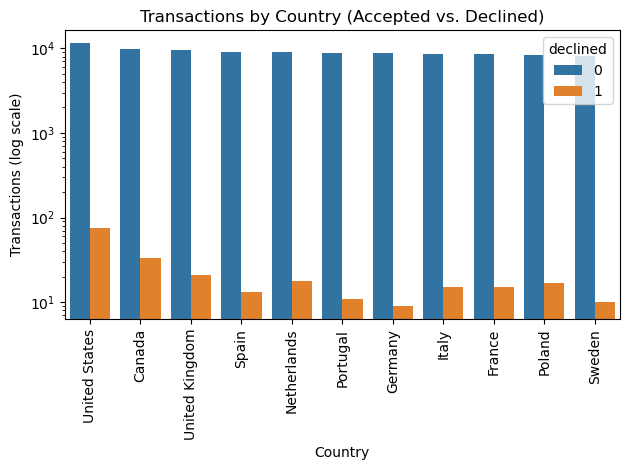

In [117]:
two_cat= two_cat.sort_values('count', ascending=False)
sns.barplot(data=two_cat, x='country', y='count', hue='declined')
plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Transactions (log scale)')
plt.title('Transactions by Country (Accepted vs. Declined)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The chart shows that the United States has the highest transaction volume, and in every country accepted transactions vastly outnumber declines: accepted counts range from the low thousands up to roughly ten thousand, while declines are only in the tens. Compared with the U.S., Canada, the United Kingdom, Spain, the Netherlands, Portugal, Germany, Italy, France, Poland, and Sweden have relatively similar accepted volumes, and their decline counts remain consistently low.

Ex2.6: Three combined variables

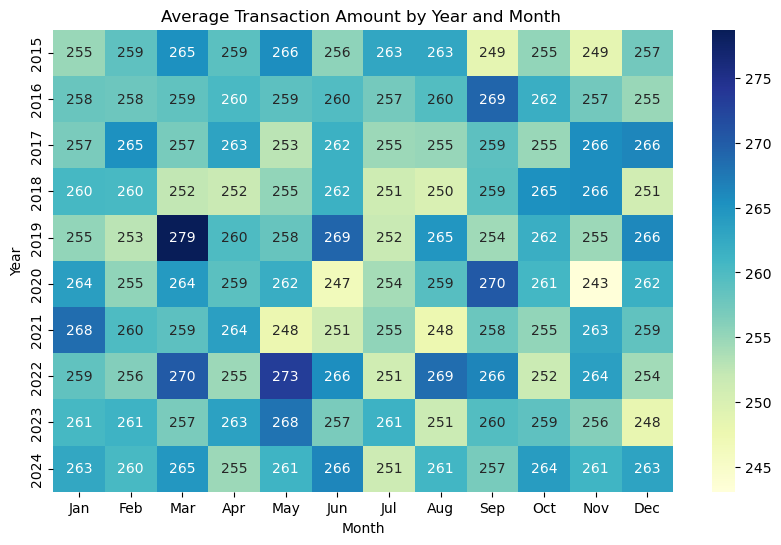

In [107]:
# Calculate average amount by year and month
pivot = tx.pivot_table(
    index="year",
    columns="month",
    values="amount",
    aggfunc="mean"
)


month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
pivot = pivot[month_order].fillna(0)


plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Transaction Amount by Year and Month ")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

This heatmap shows the average transaction amount for each month from 2015 to 2024. The colors represent the average values, with darker shades indicating higher transaction amounts. Overall, the average amounts remain fairly stable over the years, generally fluctuating between 250 and 270. Some peaks can be observed in specific months, such as March 2019 and May 2022, where transaction amounts are noticeably higher. There is no clear long-term upward or downward trend, but slight variations across months suggest periodic or seasonal effects on transaction amounts.

Ex2.7: Create a Pairplot

In [63]:
pair_data = tx[["amount","declined", "latitude","longitude"]]
pair_data.head()

,amount,declined,latitude,longitude
0,395.43,0,46.199929,1.435540
1,155.63,0,41.597206,12.221760
2,326.01,0,29.757296,-95.379637
3,161.60,0,53.548884,-113.503053
4,148.91,0,52.208370,5.690806


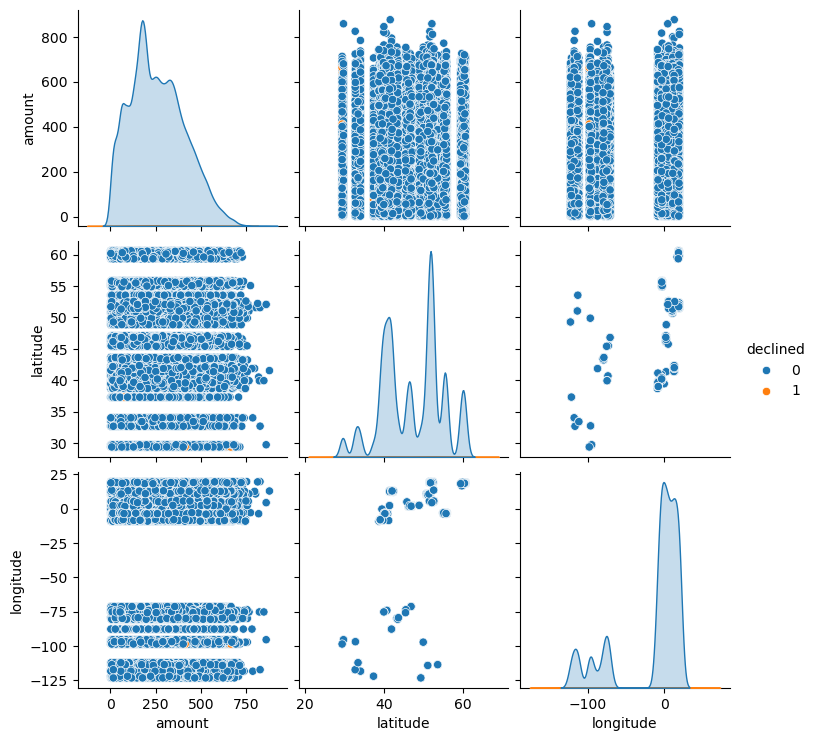

In [71]:
sns.pairplot(pair_data, hue = 'declined')

This pair plot illustrates the relationships between transaction amount, latitude, and longitude, distinguishing between approved and declined transactions. The distribution of transaction amounts is right-skewed, indicating that most transactions involve smaller amounts, while higher-value transactions are less frequent. The latitude and longitude data reveal clear clusters, suggesting that transactions originate from specific geographic regions. Declined transactions, shown in orange, are relatively few and dispersed across the same areas as approved ones, implying that neither location nor amount alone strongly predicts whether a transaction will be declined.The plot suggests limited visual separation between declined and approved transactions.

LEVEL 2

Ex1.1: Plot the correlation of some variables and interpret the results based on your data.

In [108]:
tx_prod_df=pd.merge( products, tx_products, left_on='id', right_on='product_id', how='inner')

tx_prod_user_df=pd.merge( tx_prod_df, tx_users_df, on='transaction_id', how='inner')

tx_prod_user_df.columns

Index(['id', 'product_name', 'price', 'colour', 'weight', 'warehouse_id',
       'transaction_id', 'product_id', 'card_id', 'business_id', 'timestamp',
       'amount', 'declined', 'product_ids', 'user_id', 'latitude', 'longitude',
       'year', 'month', 'id_y', 'region', 'name', 'surname', 'phone', 'email',
       'birth_date', 'country', 'city', 'postal_code', 'address', 'age'],
      dtype='object')

In [110]:
numeric_df = tx_prod_user_df[["amount","price","age","weight"]]
correlation = numeric_df.corr()
correlation

,amount,price,age,weight
amount,1.000000,0.400253,0.002825,0.044143
price,0.400253,1.000000,0.002213,0.105128
age,0.002825,0.002213,1.000000,0.005585
weight,0.044143,0.105128,0.005585,1.000000


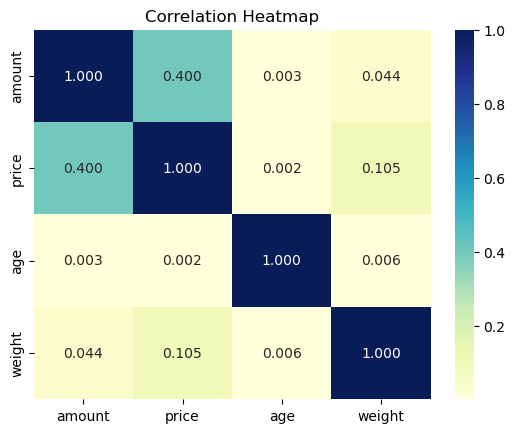

In [111]:
sns.heatmap(correlation, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()

This heatmap displays the correlation between numerical variables: amount, price, age, and weight. The color intensity indicates the strength of the correlation.
There is a moderate positive correlation (0.4) between amount and price, suggesting that higher prices tend to be associated with larger amounts.
Other variables show very weak or no correlation, indicating little to no linear relationship among them.

Ex1.2: Implement a Jointplot to explore the relationship between two variables and interpret the results based on your data.

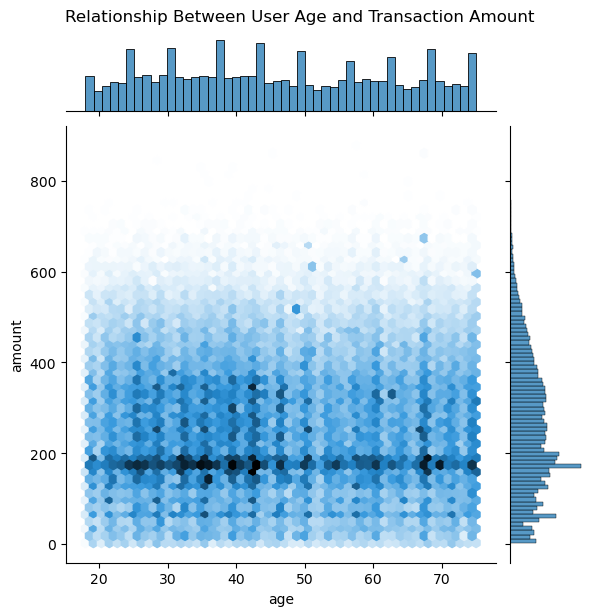

In [109]:
sns.jointplot(data=tx_users_df,x="age",y="amount",kind="hex")
plt.suptitle("Relationship Between User Age and Transaction Amount", y=1.02)
plt.show()

This hexbin jointplot illustrates the relationship between user age and transaction amount. The visualization shows that most transactions are concentrated within the lower to mid-range amounts (around 100–300), represented by the darker hexagonal areas. The distribution remains relatively uniform across all age groups, suggesting no clear correlation between age and transaction value. In other words, users of different ages tend to make purchases of similar amounts, indicating that age does not play a significant role in determining transaction behavior within this dataset.